### Exercise 10.2
PH 295  
Nick Ball  
**Purpose:**
Measure radioactive decay over a given period of time and given multiple probabilities.

*Probability of Decay:*
$$
p(t) = 1-2^{-t \,/\,T}
$$

In [1]:
#Import Functions
from random import random
from numpy import arange
from matplotlib import pyplot as plt

In [11]:
#Constants
#Initial amount of material
NBi_213 = 10000
NBi_209 = 0
NTl = 0
NPb = 0

#Half lives of material and time step tau
TBi = 46*60   # Bi-213 half-life in seconds
TTl = 2.2*60  # Tl half-life in seconds
TPb = 3.3*60  # Pb half-life in seconds
tau = 1.0     #time step in seconds

#Probability of decay & max time
pBi = 1 - 2**(-tau/TBi)
pTl = 1 - 2**(-tau/TTl)
pPb = 1 - 2**(-tau/TPb)
tmax = 20000

#Lists for plotting
tpoints = arange(0.0,tmax,tau)
Bi_213points = []
Bi_209points = []
Tlpoints = []
Pbpoints = []

dbg = 0

#Decay Simulation
for t in tpoints:
    #Append points to list of atoms
    Bi_213points.append(NBi_213)
    Bi_209points.append(NBi_209)
    Tlpoints.append(NTl)
    Pbpoints.append(NPb)
    
    #Reset Decays
    decay1 = 0
    decay2 = 0
    
    #For each atom of Pb, count if it decays or not
    for i in range(NPb):
        if random() < pPb:                 #successful decay
            decay1 += 1
    NPb -= decay1
    NBi_209 += decay1
    
    #Reset Decays
    decay1 = 0
    decay2 = 0
    
    #For each Tl atom, count if it decays or not
    for j in range(NTl):
        if random() < pTl:                 #successful decay
            decay1 += 1   
    NTl -= decay1
    NPb += decay1
        
    #Reset Decays
    decay1 = 0
    decay2 = 0
        
    #For each Bi-213 atom, count if it decays or not, and which way it decays
    for k in range(NBi_213):
        if random() < pBi:                 #successful decay
            if random() < 0.0209:          #decay into Pb (maybe switch?)
                decay2 += 1
            else:                          #decay into Tl
                decay1 += 1
    NBi_213 -= (decay1 + decay2)
    NPb += decay1
    NTl += decay2

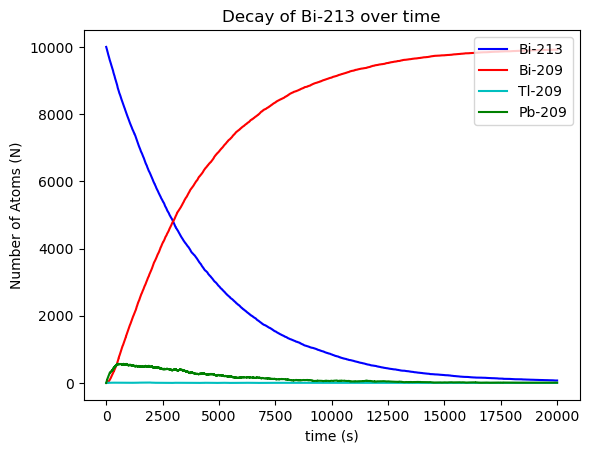

In [14]:
#Plot Them on a graph
plt.plot(tpoints,Bi_213points,'b',label = f'Bi-213')
plt.plot(tpoints,Bi_209points,'r',label = f'Bi-209')
plt.plot(tpoints,Tlpoints,'c',label = f'Tl-209')
plt.plot(tpoints,Pbpoints,'g',label = f'Pb-209')
plt.title(f'Decay of Bi-213 over time')
plt.xlabel(f'time (s)')
plt.ylabel(f'Number of Atoms (N)')
plt.legend(loc = "upper right")
plt.show()

**Conclusion:**
Don't forget proper indentation of your code kids, otherwise you'll spend 3 hours debugging code over a very basic error. I want to cry.